# UTSA CS 3793/5233: Assignment-1

Summer 2021


**Hasanul - Mahmud - (cpr793)**






## Learning Objectives


*   Read data from a file and Create a graph
*   Implement Uninformed & Informed searching strategies
*   Apply different searching strategies for the given problem
*   Analyze and Compare the searching strategies


## Description

This assignment is focused on **python file reading, graph creation** and implementation of **search algorithms**. 
In the following sections, you will complete a series of tasks for a made up problem of *Coronavirus in Texas*.

*   Coronavirus is non-discriminatory, in the sense that it can spread from one city to any other city. The only goal of the virus is to spread to all cities in Texas. Find a possible way for the virus to spread (Uninformed Search).
*   To counter the effect of the virus, vaccine needs to be distributed to all cities. One city has more demand than supply, whereas one city has a shortage of vaccines. The goal is to find an **optimal** strategy to transport the vaccine (Informed Search) from the city with high supply (low demand) to the city with low supply (high demand).

The base structure and comments are provided on what should be done. You can use some libraries that help support you for the successful completion of the assignment. However, you **CANNOT** use a complete library for the search algorithms. You can get pieces of code from online, but please cite the source properly.


#Reading Data Files & Creating a 2D Graph

##(50 points)

In this section, you will write code to read the data files provided, cities.csv and distances.csv, and create a 2D graph consisting of nodes and edges. The goal is to use this graph for the 2 search agents that you will create in the next section.

Provided with this lab, on Blackboard, you will find 2 csv files:

*   **cities.csv** - This file contains a list of coordinates for selected cities in Texas, in the following format:
```
San Antonio,29.4685,-98.5254
```
The above line means that San Antonio is located at the latitude and longitude of 29.4685 N and 98.5254 W respectively. Note that the '-ve' sign denotes 'S' for latitude and 'W' for longitude. While performing calculations you will need to ignore the sign.

*   **distances.csv** - This file contains distance values between two cities of Texas, if a path exists, in the following format:
```
San Antonio,New Braunfels,30.80876734
```
The above line denotes that there should be an edge between *San Antonio* and *New Braunfels* and the weight on that edge, i.e. the distance, is *30.80876734*.

In the code blocks below, handle the logic for the graph. Load the graph data from the give files and display a 2D graph of the given data, with labeled nodes and edges. Create as many functions or code blocks as needed.

##Extra Credit (4 points)

Overlay the 2D graph on an image of the Texas state map.





In [15]:
# Add only your imports here
from google.colab import drive
from csv import reader
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from queue import heappop, heappush
from math import inf


In [16]:
# Assume that the data files are in the following folder -- THIS WILL BE USED BY THE TA
basePath = "/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/"

In [17]:
# Load the graph data from the files


drive.mount('/content/drive/')
print("\n\n")
#Loading the distances data
print("Reading the distances data\n\n")
with open('/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/distances.csv', 'r') as read_obj:
    csv_reader = reader(read_obj)
    header = (csv_reader)
    if header != None:
        for row in csv_reader:
            # row variable is a list that represents a row in csv
            print(row[0]+"------> "+row[1]+"   "+row[2])

print("\n")


#Loading cities Data
print("Reading the cities data\n")
with open('/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/cities.csv', 'r') as read_obj:
    csv_reader = reader(read_obj)
    header = (csv_reader)
    if header != None:
        for row in csv_reader:
            # row variable is a list that represents a row in csv
            print(row[0]+"------> "+row[1]+"   "+row[2])

print()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).



Reading the distances data


San Angelo------> Midland   112.2834231
San Angelo------> Lubbock   185.1135794
San Angelo------> Abilene   95.26906977
San Angelo------> San Antonio   210.8494821
San Antonio------> New Braunfels   30.80876734
San Antonio------> Seguin   33.99204585
San Antonio------> Three Rivers   74.50909807
San Antonio------> Uvalde   82.70993933
Austin------> San Marcos   30.71742595
Austin------> Round Rock   18.46400955
Austin------> College Station   106.7588224
Austin------> Houston   165.9076541
Temple------> Waco   35.94252628
College Station------> Waco   97.82787143
College Station------> Houston   99.20917694
Houston------> Beaumont   99.57951346
Houston------> Galveston   65.02139954
Houston------> Columbus   72.51512174
Houston------> Sugar Land   59.1357829
Victoria------> Gonzalez   60.3723092
Gonzalez------> Seguin   33.42

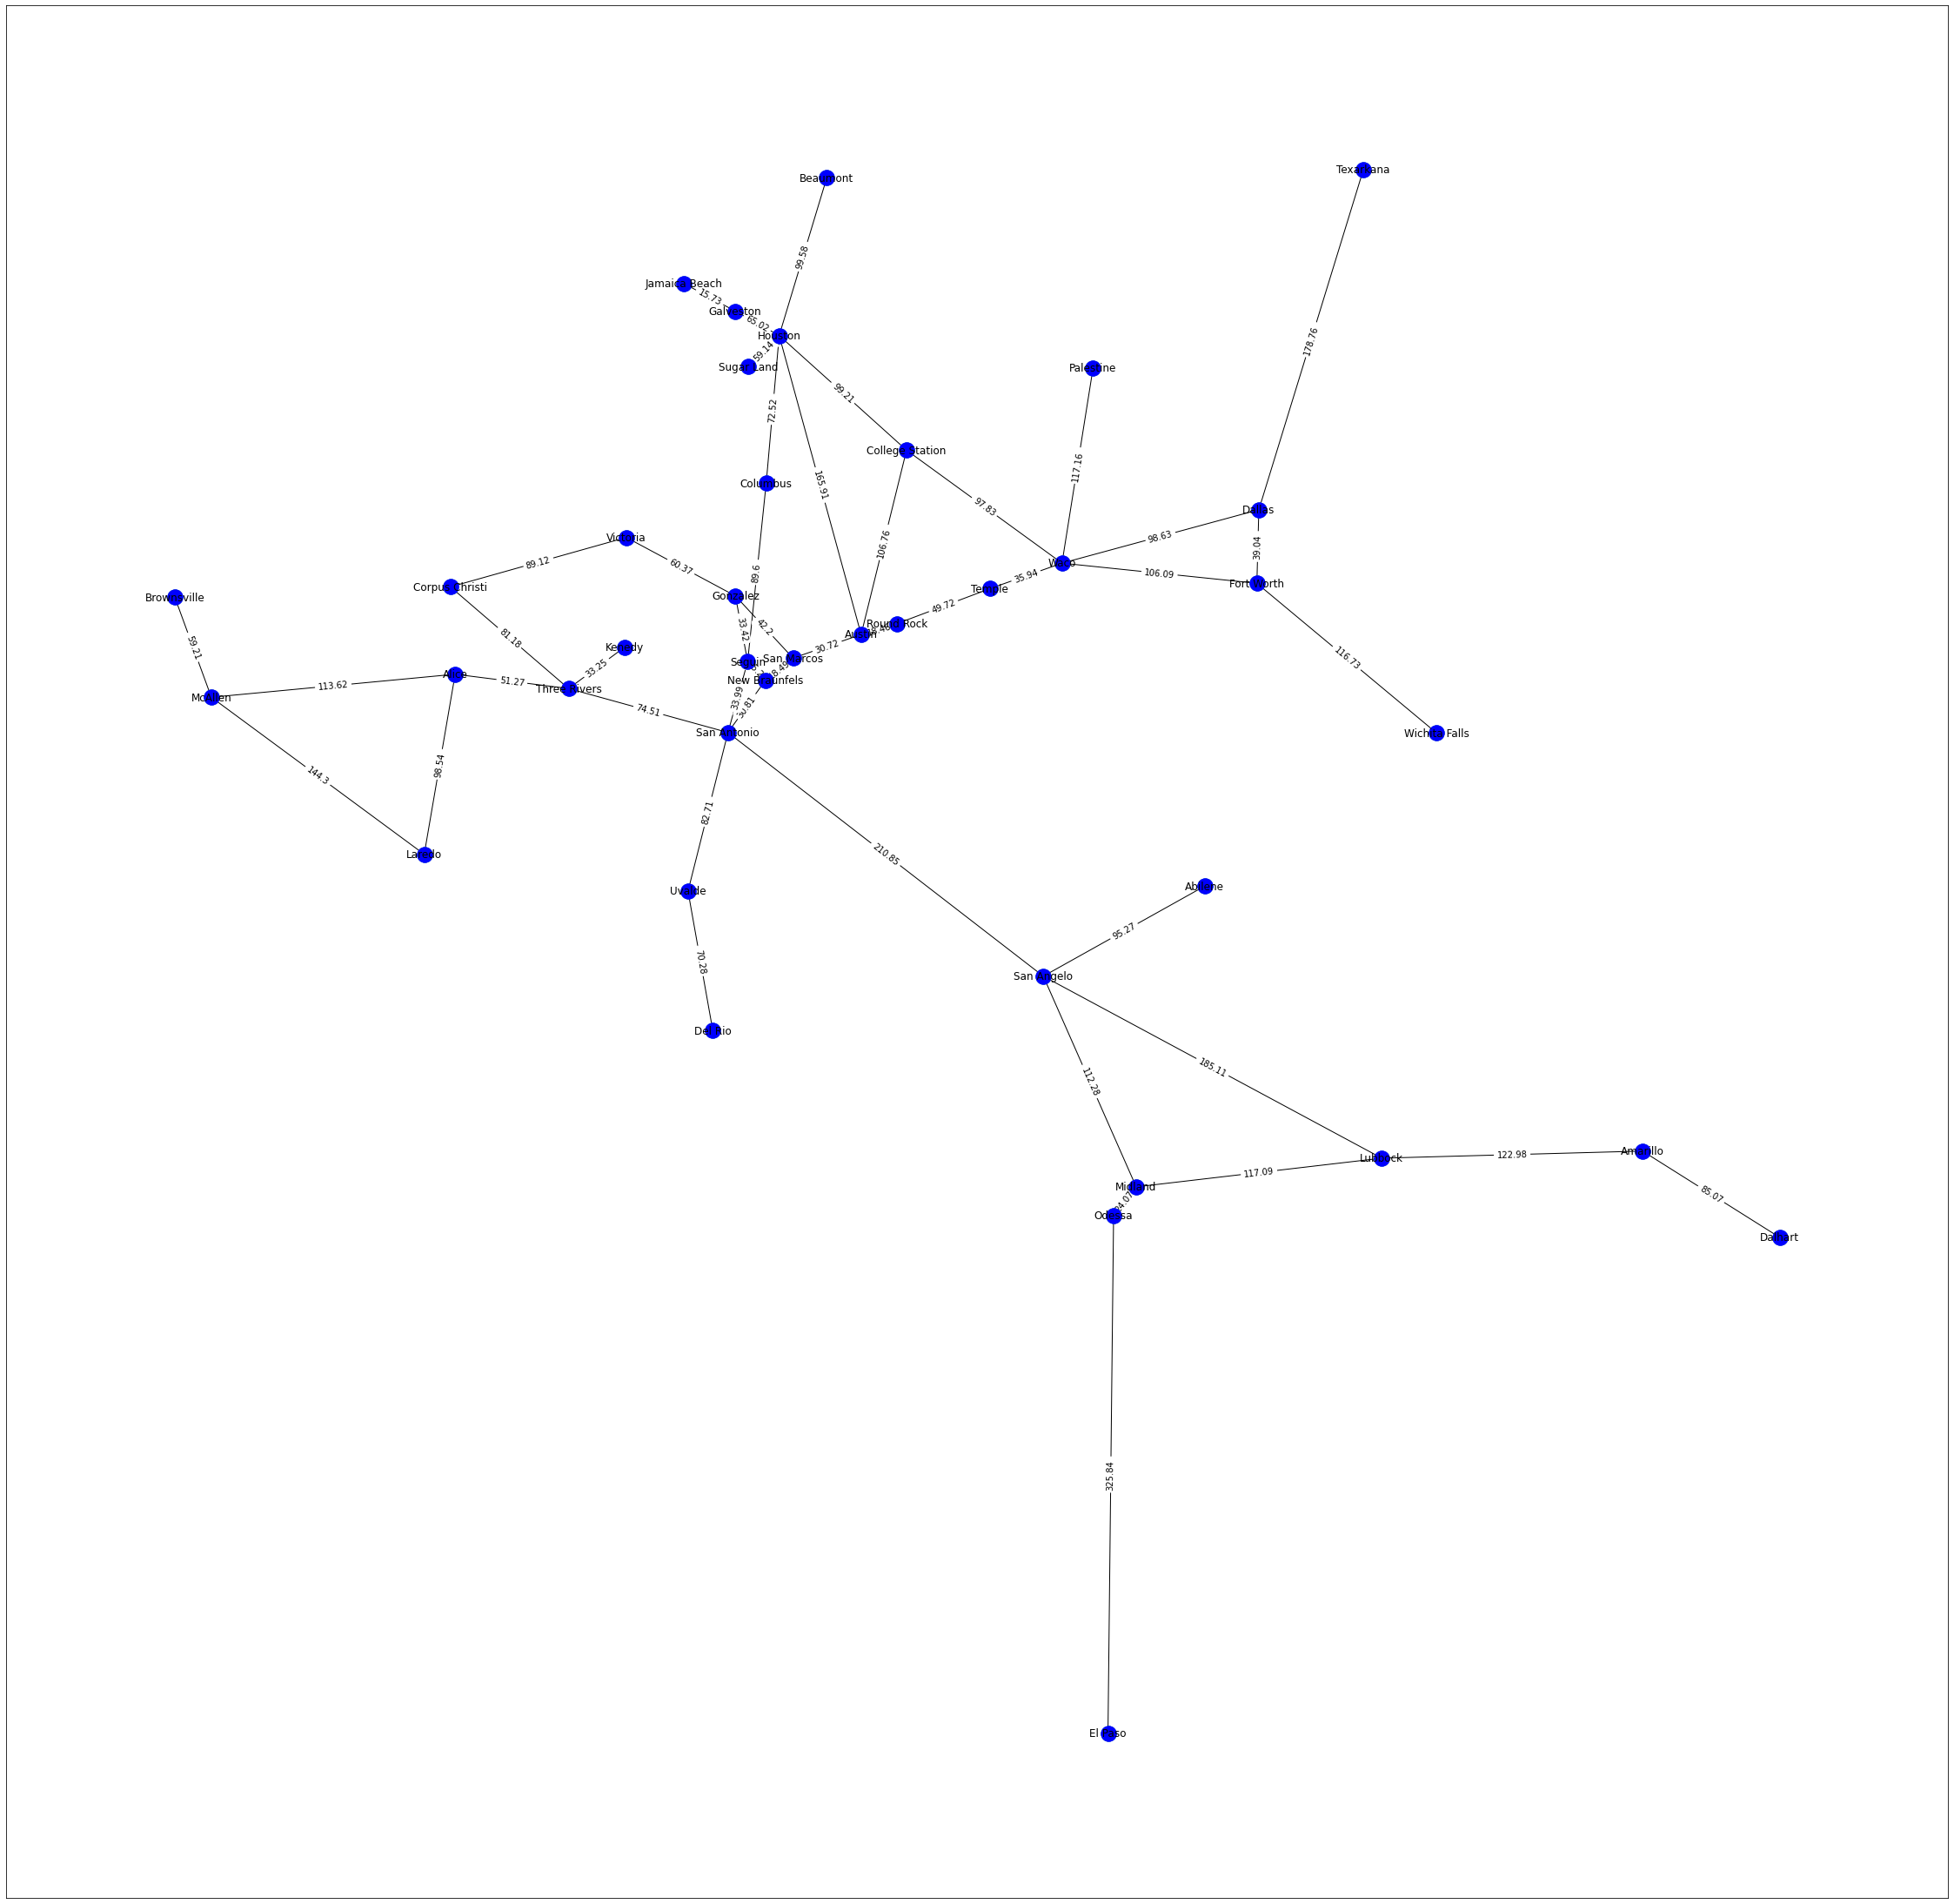

In [18]:
# Display a 2D graph of the given data.
"""
Created on Mon Sep 20 10:50:10 2021

@author: hasan
"""
plt.figure(figsize=(40,40))
G = nx.Graph()
with open('/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/distances.csv', 'r') as read_obj:
    csv_reader = reader(read_obj)
    #weight = None
    header = (csv_reader)
    # Check file as empty
    if header != None:
        # Iterate over each row after the header in the csv
        for row in csv_reader:
            # row variable is a list that represents a row in csv
            #print(row[0]+"------> "+row[1]+"   "+row[2])
            ##rounding the length of the node uptp 2 places for better visualization.
            G.add_edge(row[0],row[1], weight=round(float(row[2]),2))

#pos=nx.spring_layout(G) # pos = nx.nx_agraph.graphviz_layout(G)
hashmap ={}
with open('/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/cities.csv', 'r') as read_obj:
    csv_reader = reader(read_obj)
    #weight = None
    header = (csv_reader)
    # Check file as empty
    if header != None:
        # Iterate over each row after the header in the csv
        for row in csv_reader:
            #row variable is a list that represents a row in csv
            #print(row[0]+"------> "+row[1]+"   "+row[2])
            hashmap [row[0]]= float(row[1]),float(row[2])
            
pos = hashmap
#print(pos)
#print(hashmap)
#pos = nx.nx_agraph.graphviz_layout(G)
#nx.draw_networkx(G,pos,node_size=500,font_size=20)
#labels = nx.get_edge_attributes(G,'weight')
#nx.draw_networkx_edge_labels(G,pos,font_size=15,edge_labels=labels)
nx.draw_networkx(G, pos)
#labels = nx.get_edge_attributes(G,'weight')
edge_labs = dict([( (u,v), d['weight']) for u,v,d in G.edges(data=True)])
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labs)
nx.draw_networkx_nodes(G, pos, node_color='b')
plt.show()


#Virus Spread - Uninformed Search Agent

##(50 points)

In this section, you will use the graph created in the previous section and create an *uninformed search* agent that will print the path how the virus will spread to all the provided Texas cities. The first confirmed case of the virus was in **Three Rivers** and starts spreading from there. The virus does not discriminate and it needs to spread to all the cities of Texas.

In the following code block, write code to implement **any** uninformed search strategy. You are free to create more code blocks if needed. As the output, print

*   The path or sequence of cities that will be infected by the spread of Coronavirus.
*   The distance travelled by the selected virus spreading strategy.

##Extra Credit (3 points)
On the 2D graph and the Texas state map, overlay the selected path along with the cities visited.



Cost: 357.28526451999994

The path to the destination is 
['Three Rivers', 'San Antonio', 'New Braunfels', 'San Marcos', 'Austin', 'Round Rock', 'Temple', 'Waco', 'Dallas']


Visualizing the route taken by uninformed  agent



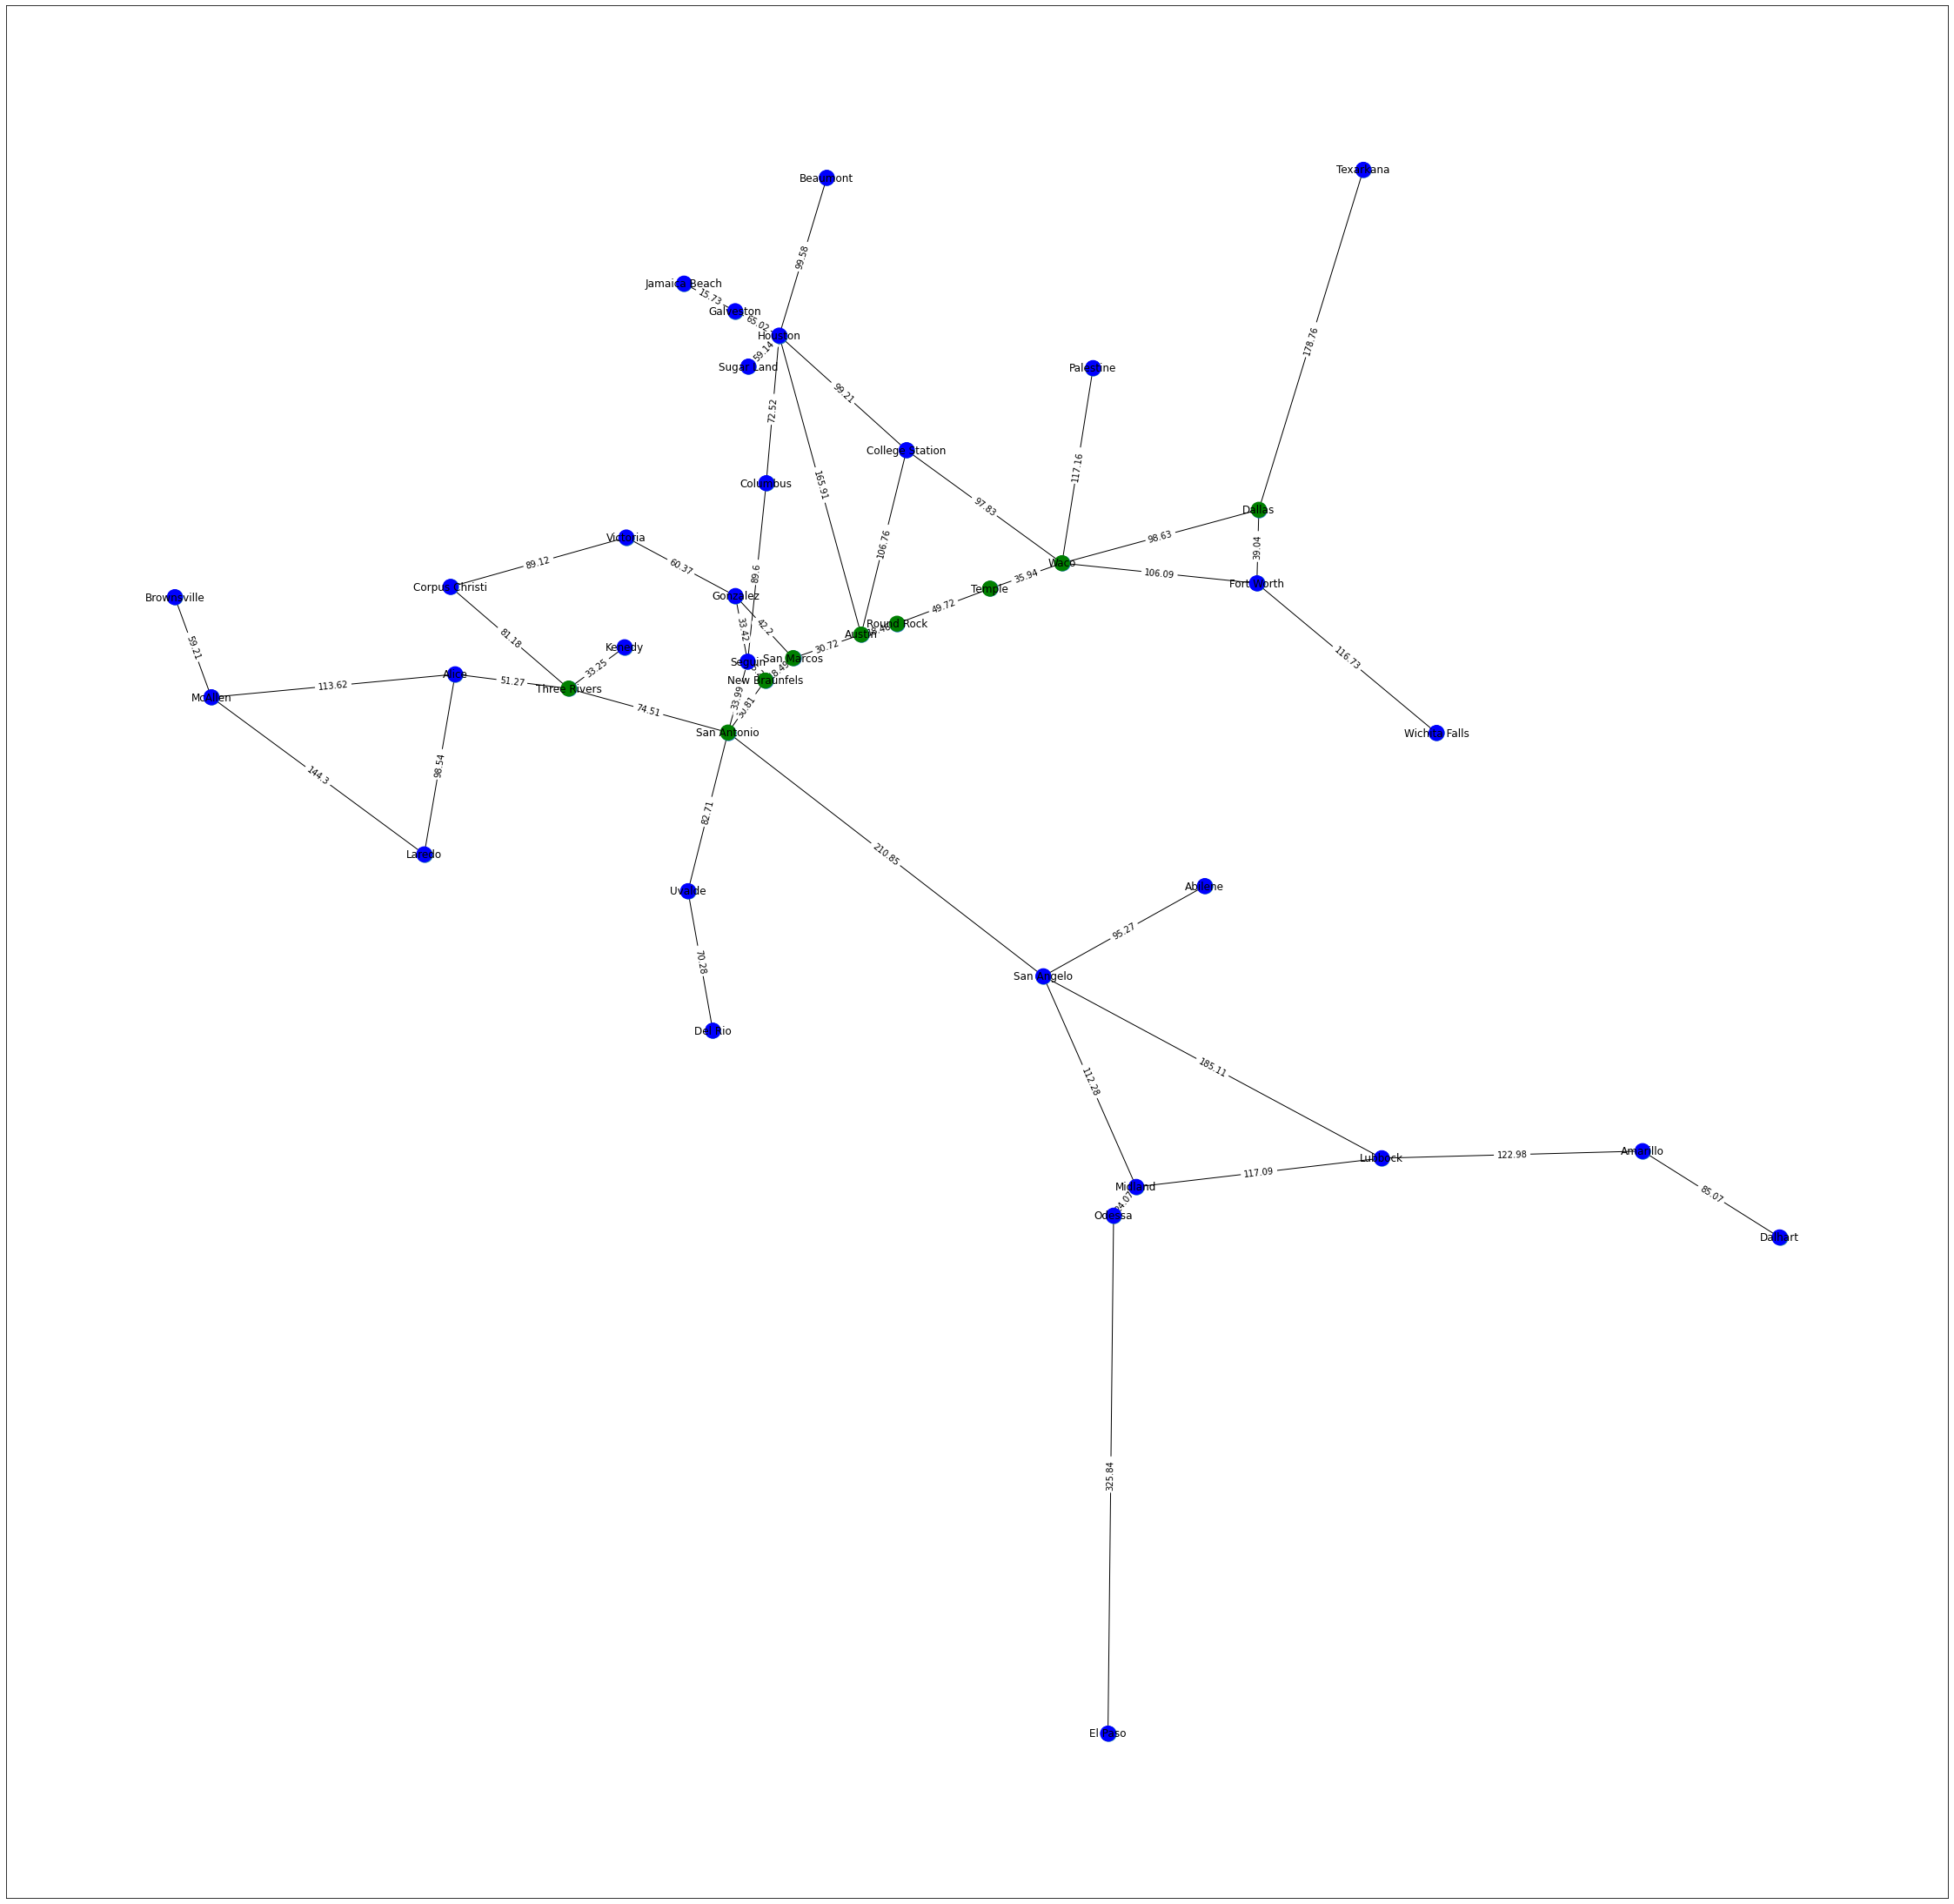

In [19]:
# Implement ANY uninformed search strategy for the spread of coronavirus from the starting city of 'Three Rivers'
# -*- coding: utf-8 -*-
"""
Created on Sat Sep 11 19:52:35 2021

@author: hasan
"""
class Graph_uninformed():
    def __init__(self):
        self.edges = defaultdict(list)
        self.weights = {}
    
    def add_edge(self, from_node, to_node, weight):
        # Note: assumes edges are bi-directional
        #print(from_node)
        #print(to_node)
        self.edges[from_node].append(to_node)
        self.edges[to_node].append(from_node)
        self.weights[(from_node, to_node)] = weight
        self.weights[(to_node, from_node)] = weight
        
graph = Graph_uninformed()



#print()
            
edges = [
    ('San Angelo','Midland',112.2834231),
    ('San Angelo', 'Lubbock', 185.1135794),
    ('San Angelo', 'Abilene', 95.26906977),
    ('San Angelo', 'San Antonio', 210.8494821),
    ('San Antonio', 'New Braunfels', 30.80876734),
    ('San Antonio', 'Seguin', 33.99204585),
    ('San Antonio', 'Three Rivers', 74.50909807),
    ('San Antonio', 'Uvalde', 82.70993933),
    ('Austin', 'San Marcos', 30.71742595),
    ('Austin', 'Round Rock', 18.46400955),
    ('Austin', 'College Station', 106.7588224),
    ('Austin', 'Houston', 165.9076541),
    ('Temple', 'Waco', 35.94252628),
    ('College Station', 'Waco', 97.82787143),
    ('College Station', 'Houston', 99.20917694),
    ('Houston', 'Beaumont', 99.57951346),
    ('Houston', 'Galveston', 65.02139954),
    ('Houston', 'Columbus', 72.51512174),
    ('Houston', 'Sugar Land', 59.1357829),
    ('Victoria', 'Gonzalez', 60.3723092),
    ('Gonzalez', 'Seguin', 33.4234923),
    ('Corpus Christi', 'Victoria', 89.12185636),
    ('Corpus Christi', 'Three Rivers', 81.17701954),
    ('Alice', 'Laredo', 98.54431104),
    ('Alice', 'Three Rivers', 51.26861733),
    ('Alice', 'McAllen', 113.6156404),
    ('Laredo', 'McAllen', 144.3001337),
    ('Del Rio', 'Uvalde', 70.27570426),
    ('El Paso', 'Odessa', 325.8408357),
    ('McAllen', 'Brownsville', 59.20599771),
    ('Waco', 'Palestine', 117.156828),
    ('Waco', 'Fort Worth', 106.0914711),
    ('Waco', 'Dallas', 98.6300601),
    ('Dallas', 'Fort Worth', 39.03943436),
    ('Lubbock', 'Midland', 117.0903414),
    ('Lubbock', 'Amarillo', 122.9827931),
    ('Amarillo', 'Dalhart', 85.07238807),
    ('Fort Worth', 'Wichita Falls', 116.7311896),
    ('Midland', 'Odessa', 24.06690284),
    ('San Marcos', 'New Braunfels', 18.48948572),
    ('San Marcos', 'Gonzalez', 42.19972218),
    ('New Braunfels', 'Seguin', 15.28073104),
    ('Columbus', 'Seguin', 89.60403948),
    ('Galveston', 'Jamaica Beach', 15.73246703),
    ('Texarkana', 'Dallas', 178.7551002),
    ('Three Rivers', 'Kenedy', 33.25447966),
    ('Round Rock', 'Temple', 49.72389151),
    
]

for edge in edges:
    graph.add_edge(*edge)
    
    
def uninformed_search(graph, initial, end):
    # shortest paths is a dict of nodes
    # whose value is a tuple of (previous node, weight)
    shortest_paths = {initial: (None, 0)}
    current_node = initial
    visited = set()
    
    while current_node != end:
        visited.add(current_node)
        destinations = graph.edges[current_node]
        weight_to_current_node = shortest_paths[current_node][1]

        for next_node in destinations:
            weight = graph.weights[(current_node, next_node)] + weight_to_current_node
            if next_node not in shortest_paths:
                shortest_paths[next_node] = (current_node, weight)
            else:
                current_shortest_weight = shortest_paths[next_node][1]
                if current_shortest_weight > weight:
                    shortest_paths[next_node] = (current_node, weight)
        
        next_destinations = {node: shortest_paths[node] for node in shortest_paths if node not in visited}
        if not next_destinations:
            return "Route Not Possible"
        # next node is the destination with the lowest weight
        current_node = min(next_destinations, key=lambda k: next_destinations[k][1])
    
    # Work back through destinations in shortest path
    path = []
    llist=[]
    next_weight =0 
    #total_weight =0
    while current_node is not None:
        path.append(current_node)
        #list.append(shortest_paths[current_node][0])
        llist.append(shortest_paths[current_node][1])
        # total_weight+= current_node[2]
        next_node = shortest_paths[current_node][0]
        next_weight = next_weight + shortest_paths[current_node][1]
        current_node = next_node
        
    # Reverse path
    path = path[::-1]
    relist = llist[::-1]
    #print(relist.pop())
    
    print()
    print()
    print("Cost: "+ str(relist.pop()))
    print("\nThe path to the destination is ")
    return path

start,goal = 'Three Rivers', 'Dallas'
uninfomred_visited_path = uninformed_search(graph, start, goal)
#print(uninformed_search(graph, start, goal))
print(uninfomred_visited_path)

print("\n\nVisualizing the route taken by uninformed  agent\n")

plt.figure(figsize=(40,40))
G = nx.Graph()
#G1 = nx.Graph()
#def get_goal_coordinates(goal):
#        with open('cities.csv', 'r') as read_obj:
#             csv_reader = reader(read_obj)
#             header = next(csv_reader)
#             if header != None:
#               for row in csv_reader:
#                if(row[0]==goal):
#                   a = row[1]
#                  b = row[2]
#                 break                         
#   return a,b
#visited_path =['San Antonio', 'New Braunfels', 'San Marcos', 'Austin', 'Round Rock', 'Temple', 'Waco', 'Dallas']
#hashpath ={}
#index =0
#length = len(visited_path)
#print(length)
#for i in range(0,length):
#    a,b = get_goal_coordinates(visited_path[i])
#    hashpath[visited_path[i]]=a,b

with open('/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/distances.csv', 'r') as read_obj:
    csv_reader = reader(read_obj)
    #weight = None
    header = (csv_reader)
    # Check file as empty
    if header != None:
        # Iterate over each row after the header in the csv
        for row in csv_reader:
            # row variable is a list that represents a row in csv
            #print(row[0]+"------> "+row[1]+"   "+row[2])
            ##rounding the length of the node uptp 2 places for better visualization.
            G.add_edge(row[0],row[1], weight=round(float(row[2]),2))
            #if(row[0]==visited_path[index] or row[1]==visited_path[index] ):
            #  if(row[0]==visited_path[index]): 
            #    a,b =get_goal_coordinates(row[0])
            #    hashpath [row[0]]= float(a),float(b)
            #    index = index +1
            #  else:
            #    a,b =get_goal_coordinates(row[1])
            #    hashpath [row[1]]= float(a),float(b)
            #    index = index +1
              

#pos=nx.spring_layout(G) # pos = nx.nx_agraph.graphviz_layout(G)
hashmap ={}
#index =0
with open('/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/cities.csv', 'r') as read_obj:
    csv_reader = reader(read_obj)
    #weight = None
    header = (csv_reader)
    # Check file as empty
    if header != None:
        # Iterate over each row after the header in the csv
        for row in csv_reader:
            #row variable is a list that represents a row in csv
            #print(row[0]+"------> "+row[1]+"   "+row[2])
            hashmap [row[0]]= float(row[1]),float(row[2])
            #if(row[0]==visited_path[index]):
            #   hashpath[row[0]]=float(row[1]),float(row[2])
            #   index = index +1
pos = hashmap
#visited_path =['San Antonio', 'New Braunfels', 'San Marcos', 'Austin', 'Round Rock', 'Temple', 'Waco', 'Dallas']
#print(pos)
#print(visited_path[3])
#for key, value in pos.items():

#   if(key==visited_path[index]):
#        print(key)
#       print(visited_path[index])
#       #edgelist[key]=value
#       index = index +1
#print(pos)
#print(hashmap)
#pos = nx.nx_agraph.graphviz_layout(G)
#nx.draw_networkx(G,pos,node_size=500,font_size=20)
#labels = nx.get_edge_attributes(G,'weight')
#nx.draw_networkx_edge_labels(G,pos,font_size=15,edge_labels=labels)
#print(hashpath)
nx.draw_networkx(G, pos)
#labels = nx.get_edge_attributes(G,'weight')
edge_labs = dict([( (u,v), d['weight']) for u,v,d in G.edges(data=True)])
#path_labs = dict([( (u,v), d['weight']) for u,v,d in G1.edges(data=True)])
#print(edge_labs)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labs)
#nx.draw_networkx_edge_labels(G, pos,edge_color='r', edge_labels=path_labs)
#nx.draw_networkx_edges(G, hashpath, edge_color='r')
color_map = []
index =0
for node in G:
    #print(node)
    if (node in uninfomred_visited_path):
        #print(node)
        #print(visited_path[index])
        color_map.append('Green')
        index=index+1
        #print(index)
    else:
        color_map.append('Blue')

nx.draw_networkx_nodes(G, pos, node_color=color_map)        
#nx.draw_networkx_nodes(G1, hashpath, node_color='r')
plt.show()




#Vaccine Transportation - Informed Search Agent

##(50 points)

In this section, you will create an *informed search* agent that will be used to transport the vaccine. The city of **San Antonio** has more supply of vaccine than the demand. The goal is to create an **optimal strategy** to transport the vaccine and make it available at the highly affected city of **College Station**, where there is a shortage of vaccines.

In the following code block, write code to implement an **optimal** informed search strategy. You are free to create more code blocks if needed. As the output, print 

*   The path / sequence of cities that will be visited in the optimal vaccine transportation strategy.
*   The total distance travelled in the optimal vaccine transportation strategy.


##Extra Credit (3 points)
On the 2D graph and the Texas state map, overlay the selected path along with the cities visited.



Manhattan Distance for each cities
{'Abilene': 292.1324999999997, 'Alice': 252.93949999999924, 'Amarillo': 558.1784999999999, 'Austin': 95.71649999999968, 'Beaumont': 145.81050000000036, 'Brownsville': 316.1234999999999, 'College Station': 0.0, 'Columbus': 62.69999999999925, 'Corpus Christi': 216.62299999999985, 'Dalhart': 642.8949999999992, 'Dallas': 147.32299999999938, 'Del Rio': 318.91199999999947, 'El Paso': 626.8679999999993, 'Fort Worth': 178.59599999999958, 'Galveston': 119.46550000000022, 'Gonzalez': 122.30899999999946, 'Houston': 93.70900000000026, 'Jamaica Beach': 149.08300000000077, 'Kenedy': 182.78699999999958, 'Laredo': 341.81949999999944, 'Lubbock': 471.3554999999998, 'McAllen': 346.9949999999999, 'Midland': 399.15699999999947, 'New Braunfels': 148.7364999999998, 'Odessa': 403.8374999999993, 'Palestine': 99.99550000000065, 'Round Rock': 78.63349999999924, 'San Angelo': 275.6324999999999, 'San Antonio': 184.18399999999986, 'San Marcos': 129.4479999999998, 'Seguin': 146.6

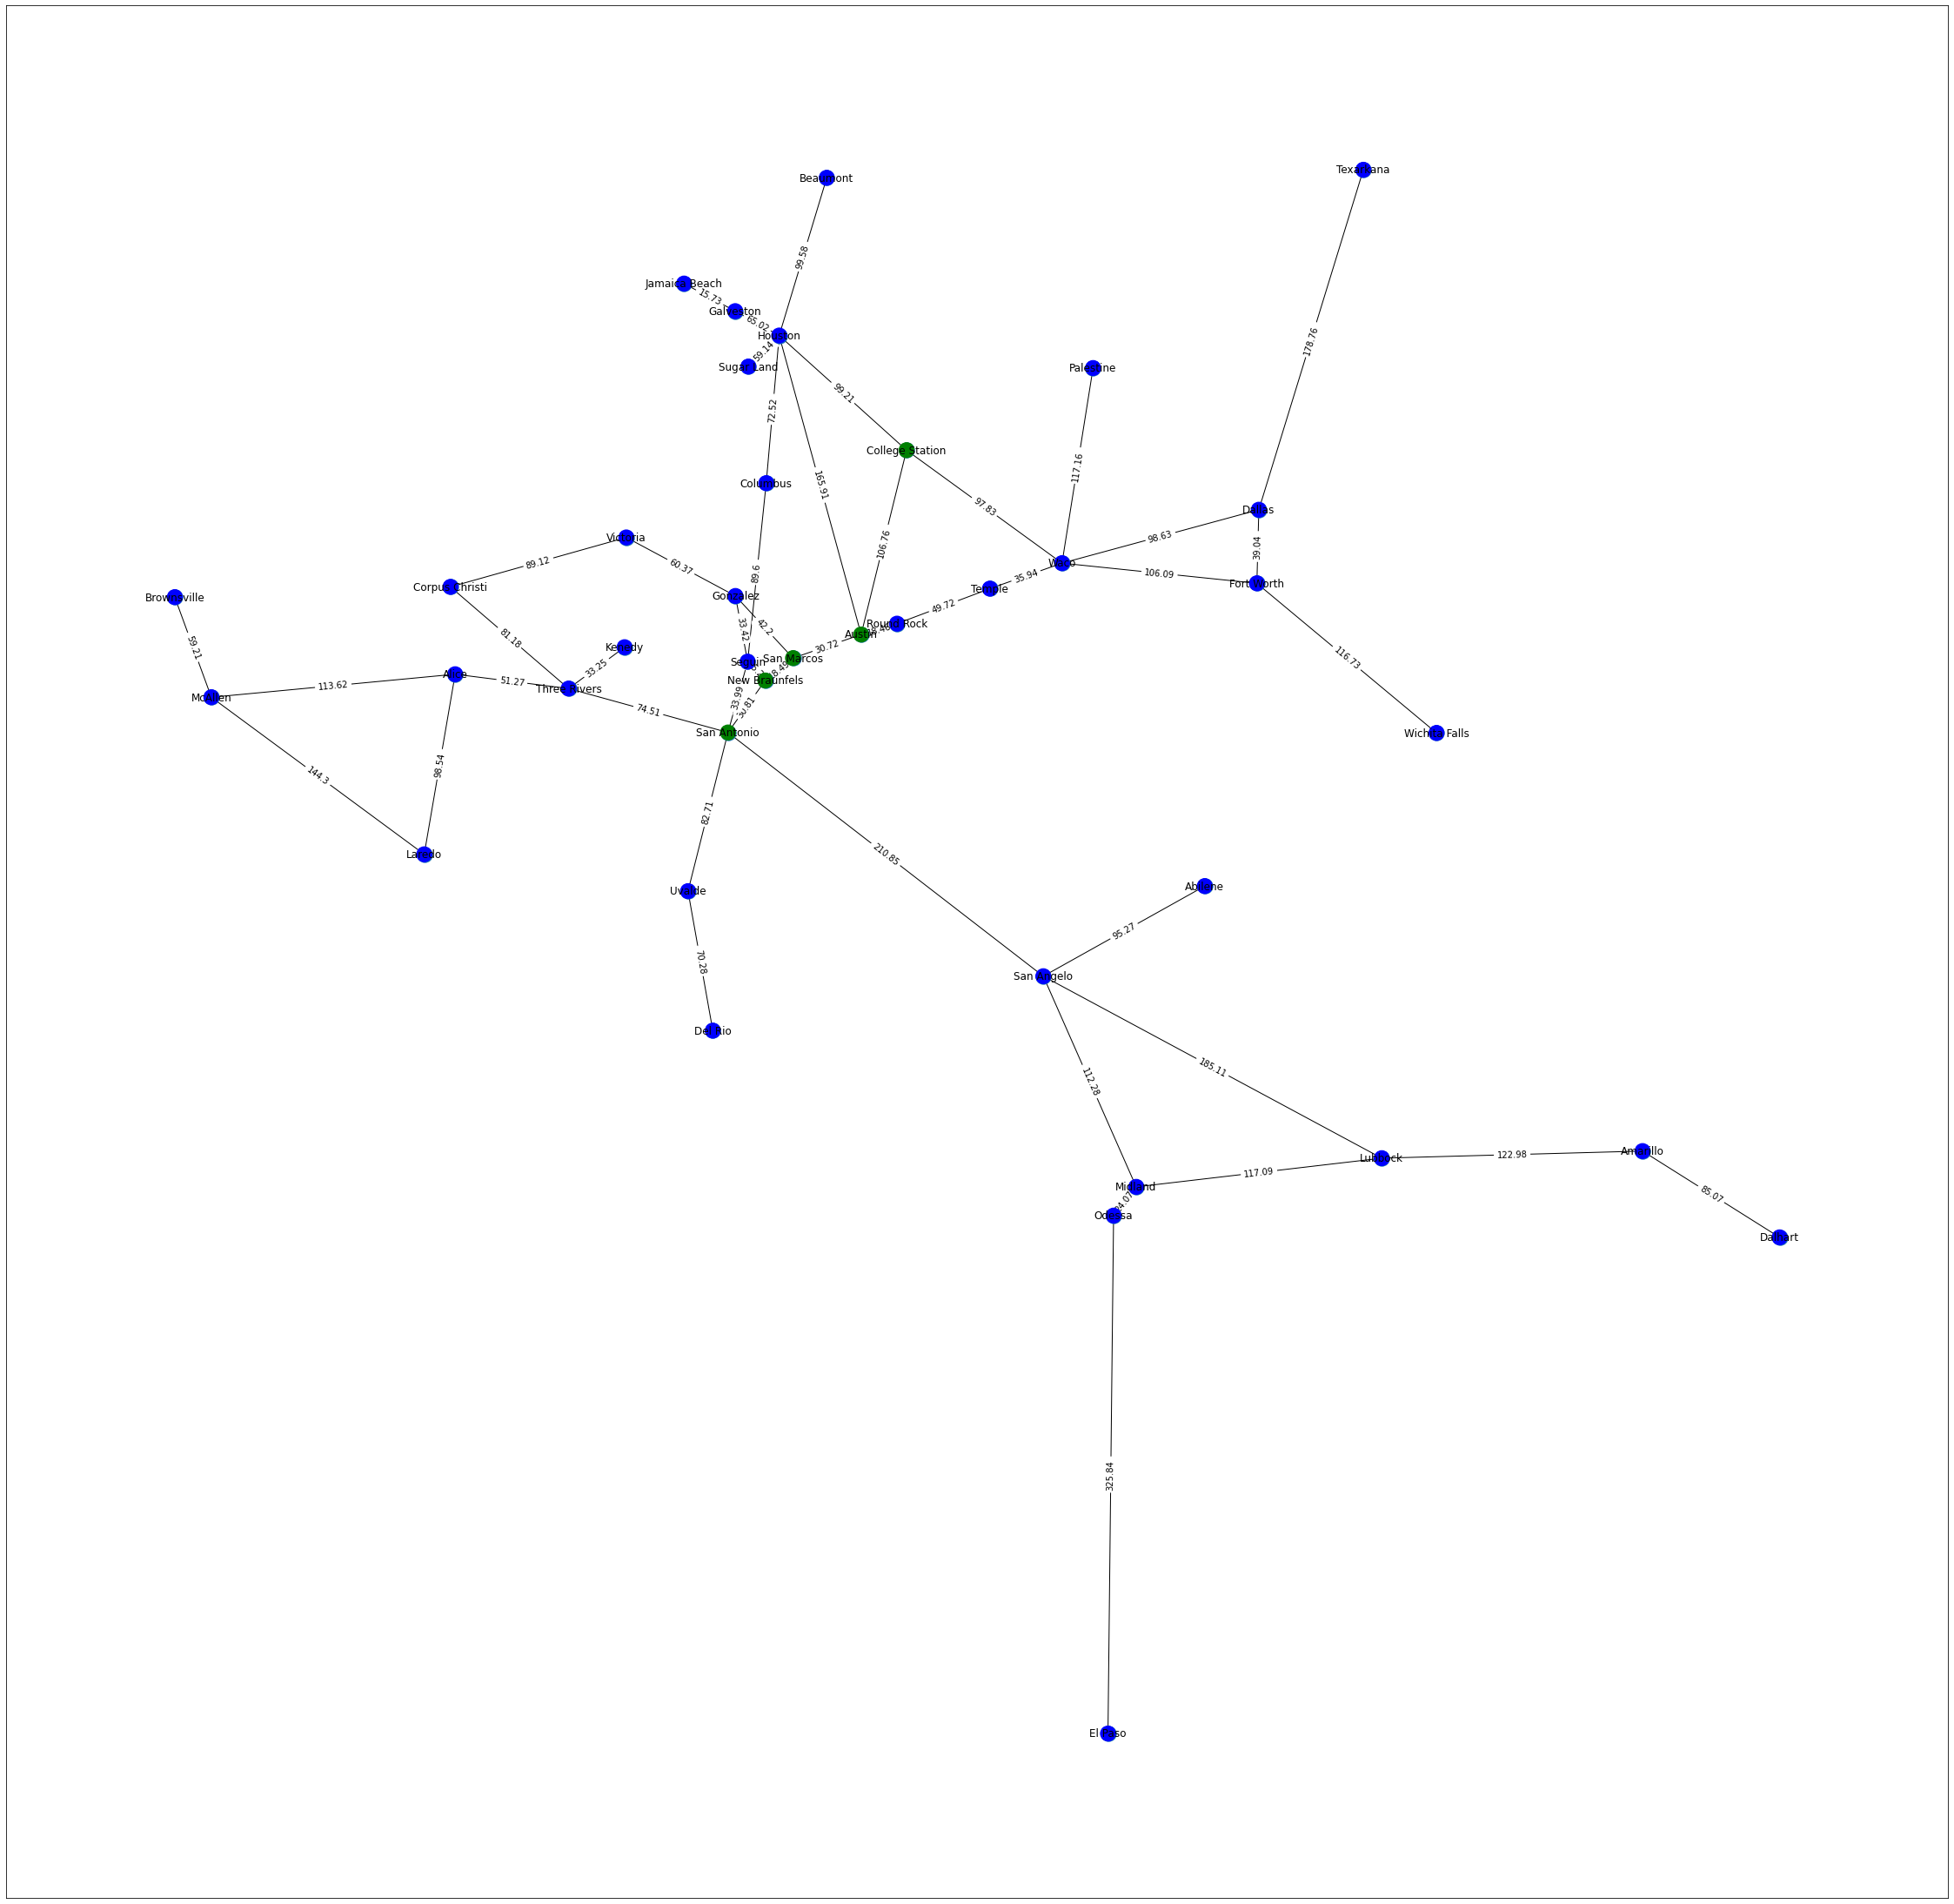

In [20]:
# Implement an OPTIMAL informed search strategy for distributing the vaccine from 'San Antonio' to 'College Station'
class Graph_informed:
    def __init__(self, directed=False):
        self.edges = {}
        self.huristics = {}
        self.directed = directed
        
    def add_edge(self, node1, node2, cost = 1, __reversed=False):
        try: neighbors = self.edges[node1]
        except KeyError: neighbors = {}
        neighbors[node2] = cost
        self.edges[node1] = neighbors
        if not self.directed and not __reversed: self.add_edge(node2, node1, cost, True)

    def set_huristics(self, huristics={}):
        self.huristics = huristics

    def neighbors(self, node):
        try: return self.edges[node]
        except KeyError: return []

    def cost(self, node1, node2):
        try: return self.edges[node1][node2]
        except: return inf

    def a_star_search(self, start, goal):
        found, frontier, visited, came_from, cost_so_far = None, [(self.huristics[start], start)], set([start]), {start: None}, {start: 0}
        #print('{:11s} | {}'.format('Expand Node', 'frontier'))
        #print('--------------------')
        #print('{:11s} | {}'.format('-', str(frontier[0])))
        while not found and len(frontier):
            #print(len(frontier))
            _, current = heappop(frontier)
         #   print('{:11s}'.format(current), end=' | ')
            if current == goal: 
                found = True
                break
            for node in self.neighbors(current):
                new_cost = cost_so_far[current] + self.cost(current, node)
                if node not in visited or cost_so_far[node] > new_cost:
                    visited.add(node)
                    came_from[node] = current
                    cost_so_far[node] = new_cost
                    heappush(frontier, (new_cost + self.huristics[node], node))
            #print(', '.join([str(n) for n in frontier]))
        if found: print(); return came_from, cost_so_far[goal]
        else: print('\nNo path from {} to {}'.format(start, goal)); return None, inf
        
    global mylist 
    mylist =[]
    @staticmethod
    def print_path(came_from, goal):
        parent = came_from[goal]
        if parent:
            Graph_informed.print_path(came_from, parent)
        else:
            #print(goal, end='')
            #mylist.append(goal)
            print()
            #return
        #print(' ->', goal, end='')
        mylist.append(goal)
        
        return mylist



    def __str__(self):
        return str(self.edges)
    
    
    def manhattan_distance(self,goal_x,goal_y):
        
        self.goal_x =goal_x
        self.goal_y = goal_y
        #print("Printing here")
        #print (goal_x)
        #print(goal_y)
        hashmap ={}
        with open('/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/cities.csv', 'r') as read_obj:
             csv_reader = reader(read_obj)
             header = (csv_reader)
             #print("Manhattan Distance for each cities\n")
             if header != None:
               for row in csv_reader:
            # row variable is a list that represents a row in csv
                 #print(row[0]+"------> "+row[1]+"   "+row[2])
                 h = abs (abs(float(row[1]))-abs(float(goal_x))) + abs (abs(float(row[2]))-abs(float(goal_y)))
                 hashmap[row[0]]= h*55

        return hashmap
    
    def get_goal_coordinates(self,goal):
        with open('/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/cities.csv', 'r') as read_obj:
             csv_reader = reader(read_obj)
             header = next(csv_reader)
             if header != None:
               for row in csv_reader:
                 if(row[0]==goal):
                     a = row[1]
                     b = row[2]
                     return a,b                         
        return 10000.00,20000.00
                         
graph = Graph_informed(directed=False)
for edge in edges:
    graph.add_edge(*edge)

#change input for your source and destination
start, goal = 'San Antonio', 'College Station'

x_coordinate, y_coordinate = graph.get_goal_coordinates(goal)
map = graph.manhattan_distance(x_coordinate,y_coordinate)
#for item in map.items():
    #if(item[0]==goal):
     #print(item[1])

graph.set_huristics(map)
print("\n")
print("Manhattan Distance for each cities")
print(map)
#start, goal = 'San Antonio', 'College Station'
traced_path, cost = graph.a_star_search(start, goal)
#print(traced_path)
#print(graph.manhattan_distance(x_coordinate,y_coordinate))
if (traced_path): 
    print('The Path to the destination:', end=' ')
    #Graph.print_path(traced_path, goal)
    informed_path= Graph_informed.print_path(traced_path, goal)
    print(informed_path)
    print('\nCost:', cost)

print("\nVisualizing the route taken by Informed agent\n")

plt.figure(figsize=(40,40))
G = nx.Graph()
#G1 = nx.Graph()
#def get_goal_coordinates(goal):
#        with open('cities.csv', 'r') as read_obj:
#             csv_reader = reader(read_obj)
#             header = next(csv_reader)
#             if header != None:
#               for row in csv_reader:
#                if(row[0]==goal):
#                   a = row[1]
#                  b = row[2]
#                 break                         
#   return a,b
#visited_path =['San Antonio', 'New Braunfels', 'San Marcos', 'Austin', 'Round Rock', 'Temple', 'Waco', 'Dallas']
#hashpath ={}
#index =0
#length = len(visited_path)
#print(length)
#for i in range(0,length):
#    a,b = get_goal_coordinates(visited_path[i])
#    hashpath[visited_path[i]]=a,b

with open('/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/distances.csv', 'r') as read_obj:
    csv_reader = reader(read_obj)
    #weight = None
    header = (csv_reader)
    # Check file as empty
    if header != None:
        # Iterate over each row after the header in the csv
        for row in csv_reader:
            # row variable is a list that represents a row in csv
            #print(row[0]+"------> "+row[1]+"   "+row[2])
            ##rounding the length of the node uptp 2 places for better visualization.
            G.add_edge(row[0],row[1], weight=round(float(row[2]),2))
            #if(row[0]==visited_path[index] or row[1]==visited_path[index] ):
            #  if(row[0]==visited_path[index]): 
            #    a,b =get_goal_coordinates(row[0])
            #    hashpath [row[0]]= float(a),float(b)
            #    index = index +1
            #  else:
            #    a,b =get_goal_coordinates(row[1])
            #    hashpath [row[1]]= float(a),float(b)
            #    index = index +1
              

#pos=nx.spring_layout(G) # pos = nx.nx_agraph.graphviz_layout(G)
hashmap ={}
#index =0
with open('/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/cities.csv', 'r') as read_obj:
    csv_reader = reader(read_obj)
    #weight = None
    header = (csv_reader)
    # Check file as empty
    if header != None:
        # Iterate over each row after the header in the csv
        for row in csv_reader:
            #row variable is a list that represents a row in csv
            #print(row[0]+"------> "+row[1]+"   "+row[2])
            hashmap [row[0]]= float(row[1]),float(row[2])
            #if(row[0]==visited_path[index]):
            #   hashpath[row[0]]=float(row[1]),float(row[2])
            #   index = index +1
pos = hashmap
#visited_path =['San Antonio', 'New Braunfels', 'San Marcos', 'Austin', 'Round Rock', 'Temple', 'Waco', 'Dallas']
#print(pos)
#print(visited_path[3])
#for key, value in pos.items():

#   if(key==visited_path[index]):
#        print(key)
#       print(visited_path[index])
#       #edgelist[key]=value
#       index = index +1
#print(pos)
#print(hashmap)
#pos = nx.nx_agraph.graphviz_layout(G)
#nx.draw_networkx(G,pos,node_size=500,font_size=20)
#labels = nx.get_edge_attributes(G,'weight')
#nx.draw_networkx_edge_labels(G,pos,font_size=15,edge_labels=labels)
#print(hashpath)
nx.draw_networkx(G, pos)
#labels = nx.get_edge_attributes(G,'weight')
edge_labs = dict([( (u,v), d['weight']) for u,v,d in G.edges(data=True)])
#path_labs = dict([( (u,v), d['weight']) for u,v,d in G1.edges(data=True)])
#print(edge_labs)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labs)
#nx.draw_networkx_edge_labels(G, pos,edge_color='r', edge_labels=path_labs)
#nx.draw_networkx_edges(G, hashpath, edge_color='r')
color_map = []
index =0
for node in G:
    #print(node)
    if (node in informed_path):
        #print(node)
        #print(visited_path[index])
        color_map.append('Green')
        index=index+1
        #print(index)
    else:
        color_map.append('Blue')

nx.draw_networkx_nodes(G, pos, node_color=color_map)        
#nx.draw_networkx_nodes(G1, hashpath, node_color='r')
plt.show()

#Submission Instructions

1.   Complete all tasks above - **File MUST contain the output for ALL cells**
2.   Export this notebook as .ipynb
      (File > Download as ipynb)
3.   Upload the .ipynb file on Blackboard

##Rubric

*   (50 points) Reading Data files & Creating a 2D Graph
*   (50 points) Virus Spread - Uninformed Search Agent
*   (50 points) Vaccine Transportation - Informed Search Agent
*   (10 points) Extra Credit - on the Texas map image, overlay the 2D graph and the paths selected by the search agents



